## Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit , njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types , pure

## Pure python function

In [17]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
  for i in range(nt):
    un[:] = u[:]
    for j in range(1,nx-1):
      u[j] = un[j] + nu * dt / dx**2 * (un[j+1] - 2*un[j] + un[j-1])
  return 0

## Numba accelerator

In [18]:
#add the numba decorator to accelerate code
@jit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
  for i in range(nt):
    un[:] = u[:]
    for j in range(1,nx-1):
      u[j] = un[j] + nu * dt / dx**2 * (un[j+1] - 2*un[j] + un[j-1])
    return 0

## Pyccel accelerator

In [19]:
#add the pyccel decorator to accelerate code
@types('float[:]','float[:]','int', 'int','float','float','float')
def solve_1d_diff_pyccel(u, un, nt, nx, dt, dx, nu):
  for i in range(nt):
    un[:] = u[:]
    for j in range(1,nx-1):
      u[j] = un[j] + nu * dt / dx**2 * (un[j+1] - 2*un[j] + un[j-1])
  return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

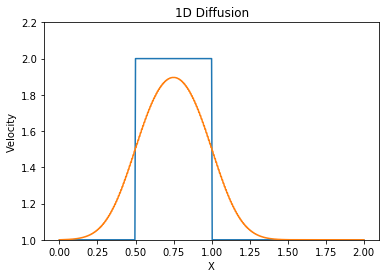

In [20]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [21]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1.05 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [22]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

The slowest run took 7.78 times longer than the fastest. This could mean that an intermediate result is being cached.
5.63 µs ± 4.64 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [23]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [24]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

687 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
